# __Tutorial 5: Integrate a Tunnel__

In this tutorial, we will explain how to add a Tunnel inside a Discrete Fracture Network and get the traces of the intersections between the fractures and our Tunnel.
<br>

At the end of this tutorial you will be able to:
* Add any type of opened surfaces from stl file
* Compute the intersections between the DFN and the surface
* Vizualise the traces
* Get data from traces

Prerequisites
:
* Creation of a DFN ([Tuto2](https://gitlab.com/fractorylab/dfnlab/-/blob/master/Tutorials/Tuto2_Generation_DFN_stochastic.ipynb))

In [1]:
import dfnlab.DFNIO as dfn_io
import dfnlab.GeometryLib as dfn_geo
import dfnlab.DFNBasis as dfn
import dfnlab.DFNGenerator as dfn_gen
import dfnlab.DataAnalysis as dfn_data

import os 

In [2]:
display = True

## Import the Tunnel from STL file and create a deformation Zone from the surface extracted

In [3]:
stlReader = dfn_data.STLReader("./sources/tunnel.stl") 
#stlReader.reScale()
tunnel = dfn.Tunnel(stlReader.getIrregularSurface())

## Create the System and add the Tunnel

In [4]:
system = dfn.System()
system.buildParallelepiped([0, 0, 0], 50.)
system.addGeometry(tunnel)

## Generate the DFN

In [5]:
fnet = dfn.DFN(system)
generator = dfn_gen.PoissonGenerator(fnet,1001) #seed=1001
generator.setSizesPowerlaw(3.,1,100)
generator.setPositionsUniform()
generator.setOrientationsFisher(45,90,15)
generator.setStopDensity(0.15)
generator.generate()

#We compute only intersections between fractures and our tunnel
fnet.computeIntersections("geometry")

## Create the VTP files

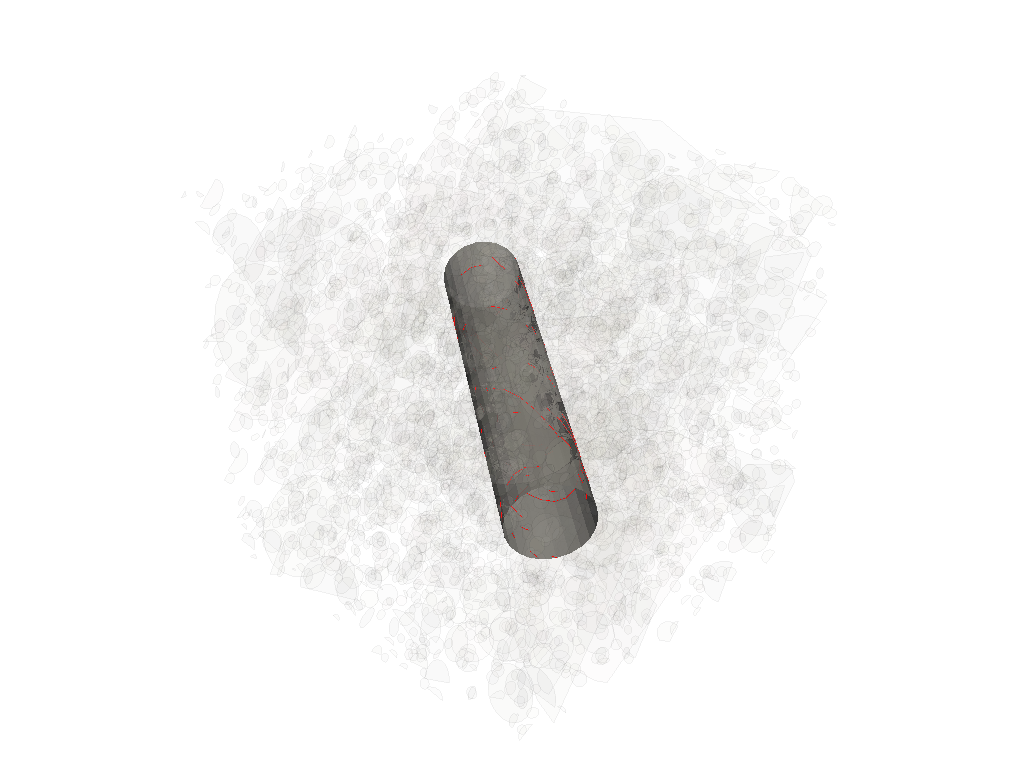

In [7]:
if display:
    path = os.getcwd()
    pathFolder = os.getcwd()+"/Tmp"
    if not os.path.isdir(pathFolder) :
        os.mkdir(pathFolder)
        
    #Create a writer from our DFN
    writer = dfn_io.DFNIO_Object(fnet)
    #Write a VTP for the DFN
    writer.createVTKDataDFN()
    #Write a VTP for the intersection (we only have intersection with the geometry as we didn't compute the others)
    writer.createVTKDataIntersections()
    #Write a VTP for the Tunnel
    writer.createVTKDataGeometries()

    writer.writeVTKOnIntersections(pathFolder+"/intersections.vtp");
    writer.writeVTKOnGeometries(pathFolder+"/Tunnel.vtp");
    writer.writeVTKOnDFN(pathFolder+"/dfn.vtp");
    
    import pyvista as pv
    p = pv.Plotter(notebook=True)
    p.set_background('white')
    visu_dfn = pv.read(pathFolder+"/dfn.vtp")
    p.add_mesh(visu_dfn, color='white', show_edges=True, edge_color='black', lighting=True, show_scalar_bar=True, opacity=0.05)
    visu_tunnel = pv.read(pathFolder+"/Tunnel.vtp")
    p.add_mesh(visu_tunnel, color='grey', show_edges=False, edge_color='black', lighting=True, show_scalar_bar=True, opacity=0.9)
    visu_inter = pv.read(pathFolder+"/intersections.vtp")
    p.add_mesh(visu_inter, color='red', show_edges=False, edge_color='black', lighting=True, show_scalar_bar=True)
    p.show(auto_close=False, use_panel=False)

#We can now use ParavView to display our output

## Get a list of the traces

An intersection between a surface and a Fracture is a multiPolyline. In our case the tunnel is a convex surface so the traces are just polylines but bare in mind it is not the general case. 

In [8]:
numberIntersectionWithTunnel = fnet.nbIntersections("geometry")
print("number of intersection with the Tunnel: ",numberIntersectionWithTunnel)

#We can get a list of intersections object from the DFN
intersectionsWithTunnel = []
#We can get a list of the fractures that intersect with the tunnel
fracturesThatIntersectWithTunnel = []
#We can get the multiPolylines from the intersections
multiPolylines = []
#We can get the polylines form the mutliPolylines (in this case 1 polyline per multipolyline)
polylines = []
#We can regroup the traces and their relatives fractures in a list
dataList = []
for i in range (0,numberIntersectionWithTunnel) :
    intersectionsWithTunnel.append(fnet.getIntersectionGeometry(i))
    fracturesThatIntersectWithTunnel.append(fnet.getIntersectionGeometry(i).getObject2())
    multiPolylines.append(intersectionsWithTunnel[i].getMultiPolyline())
    polylines.append(multiPolylines[i].getPolylines()[0]) #We know we have only 1 polylines, it is not the general case
    data = []
    data.append(polylines[i]) 
    data.append(fracturesThatIntersectWithTunnel[i])
    dataList.append(data)

number of intersection with the Tunnel:  68


## Exploit the data

dataList is a 2 dimensionnal list that you can access in this way  : dataList[numberOfTrace][typeOfData]

* typeOfData => 0 return the trace as a polyline. For example you can get size from it
* typeOfData => 1 return the fracture associated to the trace. For example you can get dip/dipD from it


In [9]:
for i in range(0,len(dataList)) :
    print("Trace number: ",i)
    print("size: ",dataList[i][0].size())
    print("dip/dipD: ",dataList[i][1].dipD())
    print(" ")

Trace number:  0
size:  2.0841518616993384
dip/dipD:  (64.44280107053952, 74.79940818119958)
 
Trace number:  1
size:  0.5617101183144664
dip/dipD:  (63.07116291254135, 111.0415419480266)
 
Trace number:  2
size:  1.3558339155804902
dip/dipD:  (78.58281640790236, 86.62593353304362)
 
Trace number:  3
size:  1.7961296729616762
dip/dipD:  (44.43861025151241, 51.815822846689045)
 
Trace number:  4
size:  6.761105986006853
dip/dipD:  (56.33694917231595, 68.50683114482915)
 
Trace number:  5
size:  0.7894639628707021
dip/dipD:  (39.390359191117675, 58.45933578683719)
 
Trace number:  6
size:  0.6929822804745465
dip/dipD:  (22.298720332123327, 67.90243239298584)
 
Trace number:  7
size:  0.8123293491057745
dip/dipD:  (41.2994403868257, 75.75160811775453)
 
Trace number:  8
size:  0.9459054991729419
dip/dipD:  (63.054181743133746, 69.19154470751982)
 
Trace number:  9
size:  1.217867511494907
dip/dipD:  (64.71189772934125, 84.61889195835163)
 
Trace number:  10
size:  7.7935749420151454
dip/d